[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tuankhoin/COMP30027-Practical-Solutions/blob/main/2022/Week%207.ipynb)

###### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2022 Semester 1

## Week 7 - Linear Regression

- Data set-up
- Linear Regression and Evaluation (MSE)
- Basis functions

Today, we will be examining the behaviour of **Linear Model.**

well-known _Boston Housing Dataset_ containing data about housing suburbs in Boston, Massachuetts. There are **13 features** in this dataset which are intended to be used to predict the target, the median house value in the given suburb, `MEDV`. 

For simplicity we'll only work with a single variable, the *"percentage of the population in the suburb classified as 'lower status' by the US Census service in 1978"*, `LSTAT`.


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston

### Exercise 1. 
Lets first plot `LSTAT` vs. `MEDV` in the *Boston Dataset* to see if a linear model can be plausible model here.

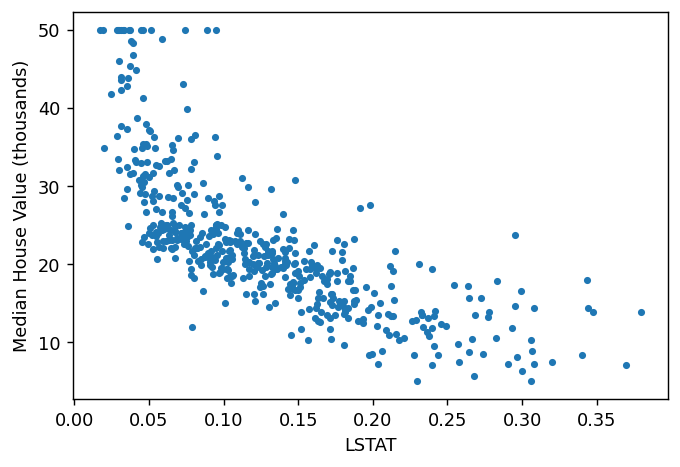

In [ ]:
# Fact: ds.B is an attribute indicating the proportion of black people in the hood.
# So because of ethical reasons, it'll throw a warning by default, 
# and in the future this attribute will probably be removed.
import warnings
warnings.filterwarnings('ignore',message='Function load_boston')

FIGURE_RESOLUTION = 128
plt.rcParams['figure.dpi'] = FIGURE_RESOLUTION

from sklearn.datasets import load_boston
boston = load_boston()
ds = pd.DataFrame(boston.data, columns=boston.feature_names)

features = ['LSTAT'] #  ds.columns  # ['RM', 'LSTAT']
target = 'MEDV'

ds['LSTAT'] = ds['LSTAT'].apply(lambda x: x/100.)

for f in features:
    plt.figure()
    plt.scatter(ds[f], boston.target, marker='.')
    plt.xlabel(f)
    plt.ylabel('Median House Value (thousands)')

plt.show()

#### Exercise 1. (a)
It seems like there is a (roughly) linear relation between these two features is visible. Let's train a Linear Regression to model the relation between the `LSTAT` and `MEDV`.

To do so we first split our dataset to two groups of `TRAIN` and `TEST`.

In [ ]:
Y = boston.target
from sklearn.model_selection import train_test_split
# Specifying random_state will get consistent random seeding result
x_full_train, x_full_test, y_train, y_test = train_test_split(ds, Y, test_size=0.2, random_state=90051)
print("Training set has {} instances. Test set has {} instances.".format(x_full_train.shape[0], x_full_test.shape[0]))


Training set has 404 instances. Test set has 102 instances.


We can use the functionality of `LinearRegression` in `sklearn` to train our model, but first let's talk about the theoritical concepts of the Linear model.

In lectures, we saw that a linear model can be expressed as:
$$y(\mathbf{x}, \mathbf{w}) = w_0 + \sum_{j = 1}^{m} w_j x_j = \mathbf{w} \cdot \mathbf{x} $$
where 

* $y$ is the *target variable*;
* $\mathbf{x} = [x_0, x_1, \ldots, x_m]$ is a vector of *features* (we define $x_0 = 1$ which is our bias); and
* $\mathbf{w} = [w_0, \ldots, w_m]$ are the *weights*.


We saw in lectures that for finding the optimum weights we can *minimize*  the following mean squared errors:  
$$E(\mathbf{w}) = \frac{1}{N} \sum_{i=1}^{n}(y_i - \mathbf{w} \cdot \mathbf{x}_i)^2$$

It's possible to solve for the optimal weights $\mathbf{w}^\star$ analytically by solving for $\nabla_{\mathbf{w}} E(\mathbf{w}) = 0$. This yields the _normal equations_ for the least squares problem:
$$\mathbf{w}^* = \left[\mathbf{X}^\top \mathbf{X}\right]^{-1} \mathbf{X}^\top \mathbf{y}$$
where $X$ is the matrix of attributes, which is also called _design matrix_. In our simple 1-feature case this is:

$$\mathbf{X} = \begin{pmatrix} 
        1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n 
    \end{pmatrix} 
  \quad \text{and} \quad 
  \mathbf{y} = \begin{pmatrix} 
          y_1 \\ y_2 \\ \vdots \\ y_n
      \end{pmatrix}
$$



Create a Datastructure for the X_train, X_test and Y _Design Matrices_.

In [ ]:
X_train = np.column_stack((np.ones_like(x_full_train[features]), x_full_train[features].values.ravel()))
X_test = np.column_stack((np.ones_like(x_full_test[features]), x_full_test[features].values.ravel()))

Y_train = y_train
Y_test = y_test

print('X_train Design matrix shape:', X_train.shape)
print('Y_train Design matrix shape:', Y_train.shape)

print('X_test Design matrix shape:', X_test.shape)
print('Y_test Design matrix shape:', Y_test.shape)

X_train Design matrix shape: (404, 2)
Y_train Design matrix shape: (404,)
X_test Design matrix shape: (102, 2)
Y_test Design matrix shape: (102,)


Using the LinearRegression module in _sklearn_, fitting a linear regression is just one line.

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, Y_train)

The `LinearRegression` module provides access to the bias weight $w_0$ under the `intercept_` property

In [ ]:
lr.intercept_

34.5153000408642

and the non-bias weights under the `coef_` property

In [ ]:
lr.coef_

array([  0.        , -95.80176887])

In [ ]:
# What else can you do?
['lr.'+d for d in dir(lr) if d[0] != '_']

['lr.coef_',
 'lr.copy_X',
 'lr.fit',
 'lr.fit_intercept',
 'lr.get_params',
 'lr.intercept_',
 'lr.n_features_in_',
 'lr.n_jobs',
 'lr.normalize',
 'lr.positive',
 'lr.predict',
 'lr.rank_',
 'lr.score',
 'lr.set_params',
 'lr.singular_']


#### Exercise 1. (b)
Show your trained model in a plot. Do you think it is a good fit? How can it be better?


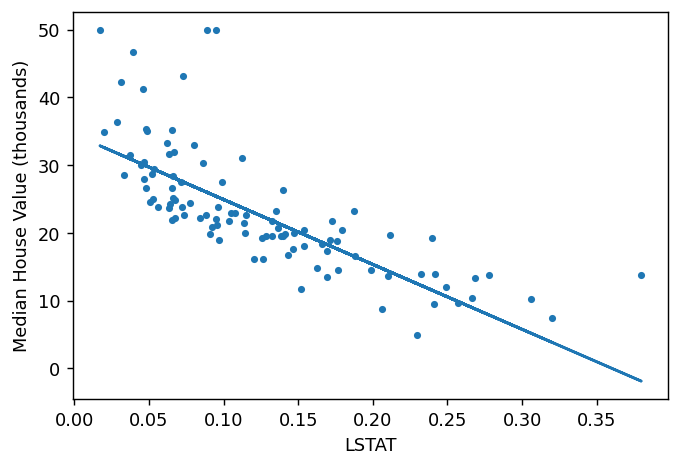

In [ ]:
y_pred = lr.predict(X_test)

plt.scatter(X_test[:,1], Y_test, marker='.')
plt.plot(X_test[:,1],y_pred)
plt.xlabel(f)
plt.ylabel('Median House Value (thousands)')

plt.show()

To check if it is a good model or not, we can use our error function. In the lectures the introduced Error(Loss) function for Linear Regression is Mean Squared Error (MSE).

$$MSE = \frac{1}{N} \sum_{i=1}^{n}(y_i - \mathbf{w} \cdot \mathbf{x}_i)^2 $$

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,y_pred)

38.004204881013074

#### Exercise 1. (c)
What happens to our model if we use the other 12 variables available in the dataset?

In [ ]:
lr_full = LinearRegression().fit(x_full_train, y_train)
y_train_pred = lr_full.predict(x_full_train)
y_test_pred = lr_full.predict(x_full_test)

print('Train MSE:', mean_squared_error(y_train,y_train_pred))
print('Test MSE:', mean_squared_error(y_test,y_test_pred))
#print('Test MSE:', mean_squared_error(X_full_test,w_full,y_test))
print('Result may vary depends on your random seed at train_test_split().'
 ' As long as they are smaller than the MSE of 1 attribute, then you should be good to go.')

Train MSE: 20.05928429120229
Test MSE: 30.726949873388413
Result may vary depends on your random seed at train_test_split(). As long as they are smaller than the MSE of 1 attribute, then you should be good to go.


*As measured by the MSE, our predictions are looking better. Although we obtained a performance boost here, in real problems you should be cautious of blindly including features in your analysis just because you can.*

### Exercise 2.
While linear regression is extremely effective in the right context, the formulation above, where we model the target $y = \mathbf{w} \cdot \mathbf{x}$ is a straight line (in a 2D dimention) which may be limit in expressing our data. 

We can increase the flexibility of our model by introducing nonlinear basis functions of the input variables, $\vec{\phi}(\mathbf{x})$ (Phi of X). 

Now our predictor $y = \mathbf{w} \cdot \vec{\phi}(\mathbf{x})$ is a nonlinear function of the input $\mathbf{x}$ (but still linear in the model parameters $\mathbf{w}$). There are many possible choices for the basis $\vec{\phi}(\mathbf{x})$, but we will focus on using polynomial basis functions with the form $\phi(x) = x^j$ in the single-variable case. 

All our previous results for linear regression carry over as you would expect, we replace $\mathbf{w} \cdot \mathbf{x}$ with $\mathbf{w} \cdot \vec{\phi}(\mathbf{x})$ - the error function and normal equations become:

\begin{equation}
    E(\mathbf{w}) = \frac{1}{N} \sum_{i=1}^{n}(y_i - \mathbf{w} \cdot \vec{\phi}(\mathbf{x}_i))^2
\end{equation}

\begin{equation}
    \mathbf{w}^* = \left[\mathbf{\Phi}^\top \mathbf{\Phi}\right]^{-1} \mathbf{\Phi}^\top \mathbf{y}
\end{equation}

Here the design matrix $\Phi \in \mathbb{R}^{n \times (m+1)}$ for $n$ datapoints and $m$ basis functions, $\vec{\phi}(\mathbf{x}) = (\phi_0(\mathbf{x}), \ldots \phi_m(\mathbf{x}))$. In the case of polynomial regression $\vec{\phi}(x) = \left(1,x,x^2,\ldots, x^m\right)$ (note the one additional bias parameter). For example, for a maximum polynomial order of 3, the design matrix is:

$$
\mathbf{\Phi} = \begin{pmatrix} 
        1 & x_1 & x_1^2 & x_1^3 \\ 1 & x_2 & x_2^2 & x_2^3 \\ \vdots & \vdots & \vdots & \vdots \\ 1 & x_n & x_n^2 & x_n^3
\end{pmatrix}
$$


#### Exercise 2. (a)
Lets start by building the design matrices.

In [ ]:
def design_matrix_poly(x, x_test, order):
    """
    Returns design matrix on training and testing data
    for polynomial basis of specified order
    """
    n, n_test, m = x.shape[0], x_test.shape[0], order + 1
    Phi_train = np.zeros([n,m])
    Phi_test = np.zeros([n_test,m])

    for k in range(order+1):
        Phi_train[:,k] = np.power(x, k)
        Phi_test[:,k] = np.power(x_test,k)

    #print('Design matrix shape (training):', Phi.shape)
    
    return Phi_train, Phi_test

In [ ]:
# In case you have an error like 'x is undefined', uncomment below:
# x = X_train[:,1]
# y = Y_train

start_order = 3
Phi_train, Phi_test = design_matrix_poly(X_train[:,1].ravel(), X_test[:,1].ravel(), order=start_order)
print('Phi_train Design matrix shape:', Phi_train.shape)
print('Phi_test Design matrix shape:', Phi_test.shape)

Phi_train Design matrix shape: (404, 4)
Phi_test Design matrix shape: (102, 4)


#### Exercise 2. (b)
Train the model using the Phi and analyse the weights ($\mathbf{w}$) of the line. 

In [ ]:
lr_poly = LinearRegression().fit(Phi_train, Y_train)

In [ ]:
lr_poly.intercept_

50.90299281581401

In [ ]:
lr_poly.coef_

array([    0.        ,  -441.35010715,  1830.96702668, -2619.62818074])

#### Exercise 2. (c)
Now let's solve the linear system using the inbuilt `numpy` routine and plot the result of the predicted values on the training set. 

**NOTE:** For teaching purpose, in this exercise we are not using the `PolynomialFeatures` module in `sklearn`. You can use the functions of `PolynomialFeatures` module if you want to use this model in future.

In [ ]:
def predict(X_test, w): 
    return np.dot(X_test, w)  # fill in

In [ ]:
def plot_fit(x_test, y_test, x, y):
    # To get connecting lines in matplotlib correct
    sort_idx = np.argsort(x_test)
    y_test = y_test[sort_idx]
    x_test = np.sort(x_test)
    plt.plot(x_test, y_test, 'b-')
    plt.scatter(x, y, marker='.')
    plt.ylabel("$y$ (Median House Price)")
    plt.xlabel("$x$ (LSTAT)")
    plt.show()

In [ ]:
def mean_squared_error(X, w, y):
    return np.mean((np.dot(X, w) - y)**2)  # fill in

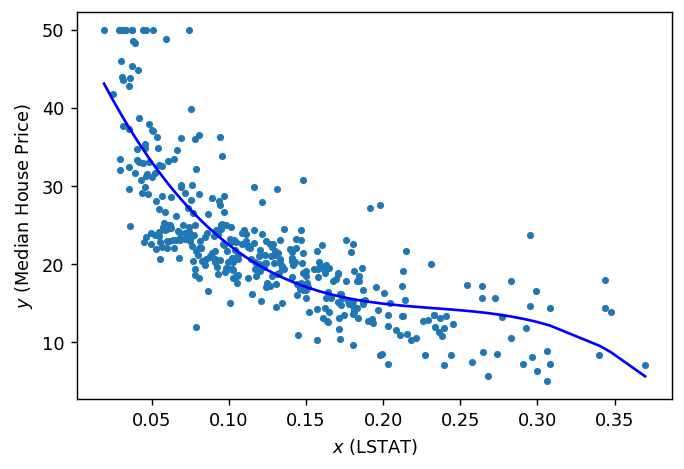

In [ ]:
w_poly = np.linalg.solve(np.dot(Phi_train.T, Phi_train), np.dot(Phi_train.T, Y_train.ravel()))
plot_fit(X_train[:,1].ravel(), predict(Phi_train, w_poly), X_train[:,1].ravel(), Y_train.ravel())

Seems like a better fit than the linear model! 


Lets scan across a range of powers. What do you expect to happen as we increase the maximum polynomial order on the training set?

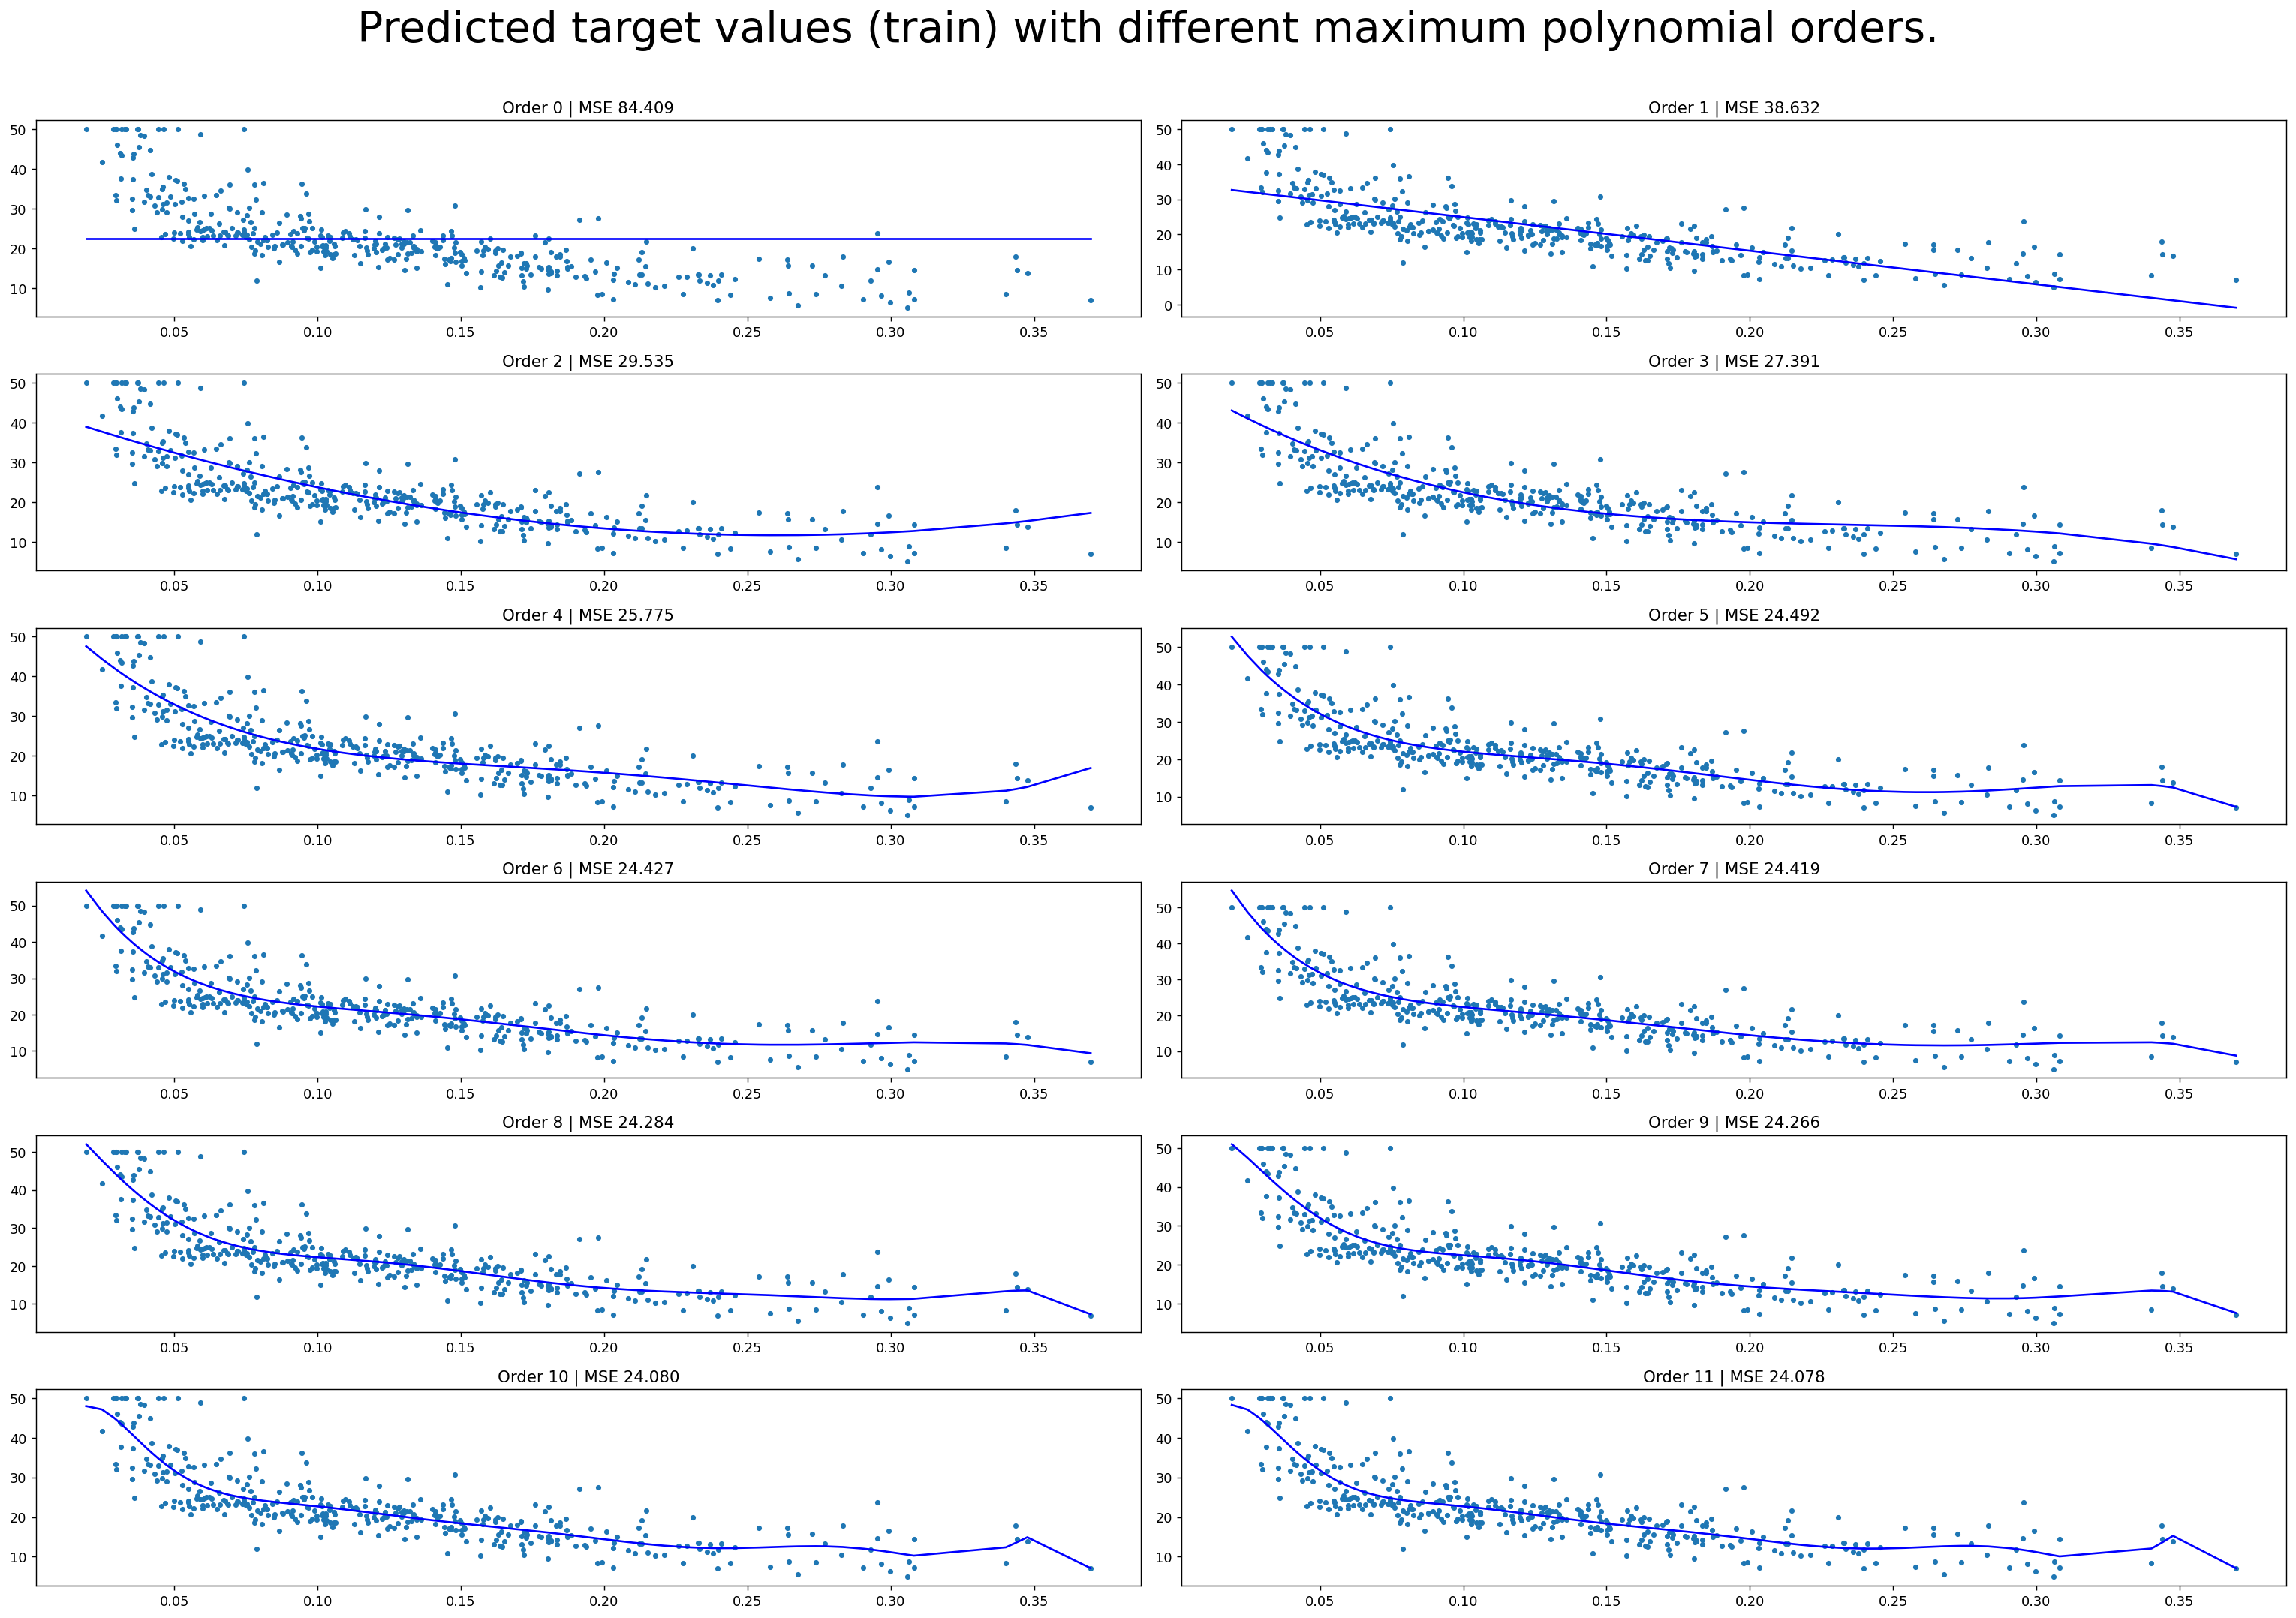

In [ ]:
orders = list(range(12))
Phi_test_orders = list()
w_orders = list()
mse_orders = list()

sort_idx = np.argsort(X_train[:,1].ravel())
y_plot = Y_train[sort_idx]
x_plot = np.sort(X_train[:,1].ravel())

plt.figure(figsize=(24,16))
for i, order in enumerate(orders):
    sub = plt.subplot(len(orders)//2, 2, i+1)    
    Phi_train, Phi_test = design_matrix_poly(X_train[:,1].ravel(), X_test[:,1].ravel(), order=order)
    w_poly = np.linalg.solve(np.dot(Phi_train.T, Phi_train), np.dot(Phi_train.T, Y_train.ravel()))
    mse = mean_squared_error(Phi_train, w_poly, Y_train.ravel())

    Phi_test_orders.append(Phi_test)
    w_orders.append(w_poly)
    mse_orders.append(mse)
    
    plt.plot(x_plot, predict(Phi_train, w_poly)[sort_idx], 'b-')
    plt.scatter(x_plot, y_plot, marker='.')
    plt.title('Order {} | MSE {:.3f}'.format(order, mse))
    plt.autoscale()
    
plt.suptitle('Predicted target values (train) with different maximum polynomial orders.', y=1.05, fontsize=32)
plt.tight_layout()
plt.show()

Now we'll repeat on the test set.

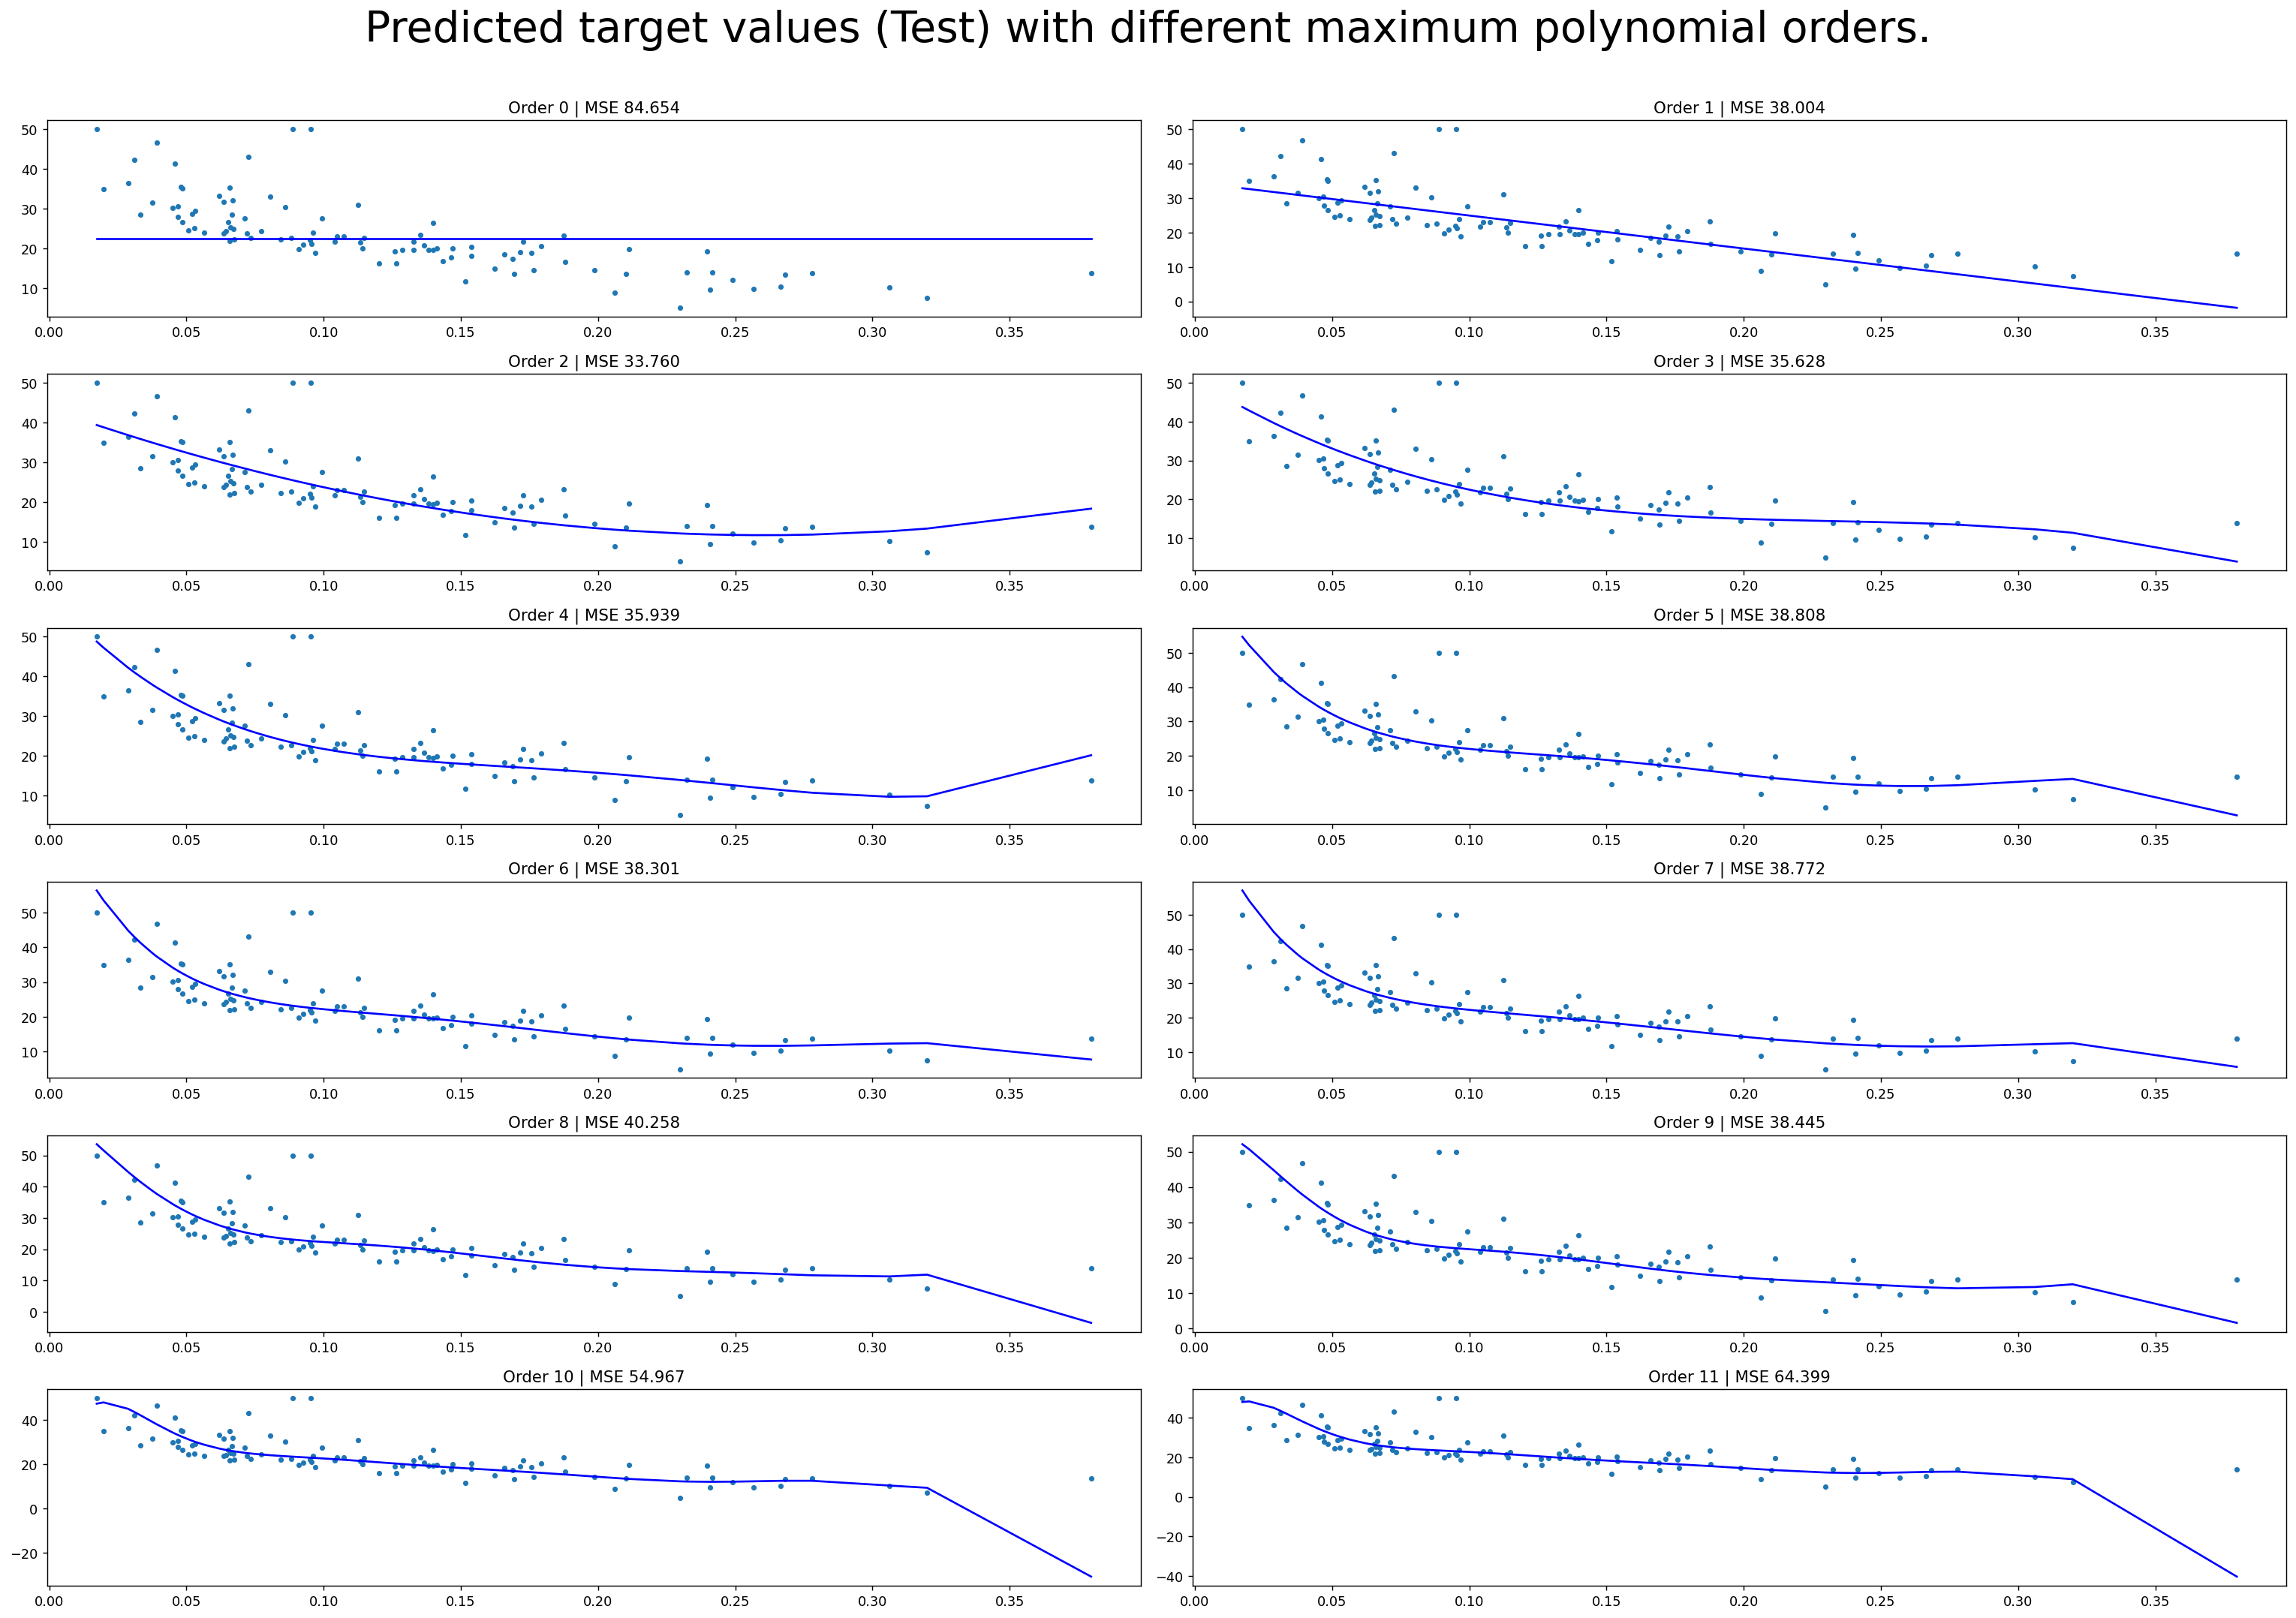

In [ ]:
mse_test_orders = list()
sort_idx = np.argsort(X_test[:,1].ravel())
y_plot = y_test[sort_idx]
x_plot = np.sort(X_test[:,1].ravel())

plt.figure(figsize=(24,16))
for i, order in enumerate(orders):
    sub = plt.subplot(len(orders)//2, 2, i+1)    
    Phi_test = Phi_test_orders[i]
    w_poly = w_orders[i]
    
    mse_test = mean_squared_error(Phi_test, w_poly, y_test)
    mse_test_orders.append(mse_test)
    

    plt.plot(x_plot, predict(Phi_test, w_poly)[sort_idx], 'b-')
    plt.scatter(x_plot, y_plot, marker='.')
    plt.title('Order {} | MSE {:.3f}'.format(order, mse_test))
    plt.autoscale()
    
plt.suptitle('Predicted target values (Test) with different maximum polynomial orders.', y=1.05, fontsize=32)
plt.tight_layout()
plt.show()

Let's plot MSE vs. polynomial order for the training data and held-out test data.

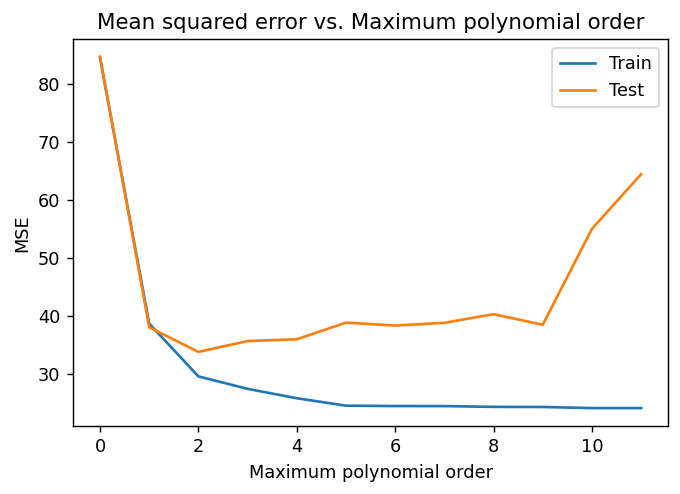

In [ ]:
plt.plot(range(len(mse_orders)), mse_orders, label='Train')
plt.plot(range(len(mse_test_orders)), mse_test_orders, label='Test')
plt.title('Mean squared error vs. Maximum polynomial order')
plt.ylabel('MSE')
plt.xlabel('Maximum polynomial order')
plt.legend()
plt.show()

*As it shows in the diagram, for polynomial orders more than two, although the MSE of the training instances is decreasing, the error of the system on predicting the label for the test instances is increasing. That's a clear sign that we with higher polynomial orders our system is losing its ability to generalise well to predict the correct label for the not previously seen instances. In other words, our model becomes "overfit".*